In [1]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
from math import floor
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

import math
import numpy as np
import secrets
import sys, os
from typing import Optional, Set, Tuple, Generator

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'python')))
from qfl_crypto import number_theory 

# MA7010 – Number Theory for Cryptography

## Week 7 Exercises (use Maple as appropriate)

Setup plotly

In [2]:
# setup
init_notebook_mode(connected=True)

U_BOUND_COL = '#EF553B'   # red
L_BOUND_COL = '#636efa'  # blue
A_TRI_COL = '#df63fa' # purple
T_BAND_COL = '#2ee831' # green
B_TRI_COL = '#f8ba32' # ochre

def show_qrt_plot(p: int, q: int):
    """ """
    #
    ps = np.array([x for x in range(1, floor((p - 1) / 2) + 1)])
    qs = np.array([y for y in range(1, floor((q - 1) / 2) + 1)])
    ns = -1 * ps
    qP = np.array([q * x % p for x in ps])
    qP = np.array([p - qp if qp > p / 2 else qp for qp in qP])
    pQ = np.array([q * x % p for x in qs])
    pQ = np.array([q - pq if pq > q / 2 else pq for pq in pQ])
    
    mu = [((x, y), q * x - p * y) for x in ps for y in qs if -p/2 < (q * x - p * y) < 0]
    nu = [((y, x), q * x - p * y) for x in ps for y in qs if -q/2 < (p * y - q * x) < 0]
    
    def is_qrt_point(x, y):
        return (q * x / p - q / (2 * p)) < y < (q * x / p + 0.5)
    
    qrt_df = pd.DataFrame({
        'x': [x for x in ps for y in qs if is_qrt_point(x, y)],
        'y': [y for x in ps for y in qs if is_qrt_point(x, y)],
    })
    
    # build traces for each x
    plot_xs = [x for x in range(floor((p - 1) / 2) + 2)]
    plot_ys = [y for y in range(floor((q - 1) / 2) + 2)]
    df = pd.DataFrame({
        'xs': plot_xs,
        'upper_bound': [q * x / p + 0.5 for x in plot_xs],
        'lower_bound': [q * x / p - q / (2 * p) for x in plot_xs],
    })
    
    traces = {}
    # boundary lines
    for col, colour in [('upper_bound', U_BOUND_COL), ('lower_bound', L_BOUND_COL)]:
        traces['trace_' + col] = go.Scatter(
            name=col, 
            mode='lines',
            showlegend=True,
            visible=True,
            x=plot_xs,
            y=df[col],
            marker = dict(color = '#108008'),
            line = dict(dash ='solid', shape='linear', width=2, color = colour),
            fillcolor = '#0000FF')

    # Markers for every (X,Y) into A, B or T
    for col, colour, t in [
        ('A', A_TRI_COL, lambda x, y: (q * x / p + 0.5) <= y), 
        ('T', T_BAND_COL, lambda x, y: (q * x / p - q / (2 * p)) < y < (q * x / p + 0.5)), 
        ('B', B_TRI_COL, lambda x, y: y <= (q * x / p - q / (2 * p)))]:
        traces['trace_' + col] = go.Scatter(
            name=col, 
            mode='markers',
            showlegend=True,
            visible=True,
            x=[x for x in ps for y in qs if t(x, y) ],
            y=[y for x in ps for y in qs if t(x, y) ],
            marker = dict(symbol='circle', color=colour),
            line = dict(dash ='solid', shape='linear', width=2, color = colour),
            fillcolor = '#0000FF')

    # convert data to form required by plotly
    data = list(traces.values())

    layout = go.Layout(
        title=f'Quadratic Reciprocity Theorem: ({p}/{q}): plot (-{p}/2 < {q}x – {p}y < {q}/2)',
        height=100 + 40 * len(plot_ys),
        width=100 + 32 * len(plot_xs),
        xaxis=go.layout.XAxis(
            title=f'1 ≤ x ≤ {(p - 1) / 2}', 
            range=[0, floor((p - 1) / 2) + 1],
            dtick=1),
        yaxis=go.layout.YAxis(
            title=f' 1 ≤ y ≤ {(q - 1) / 2}', 
            range=[0, floor((q - 1) / 2) + 1], 
            dtick=1),
    )

    # build figure
    fig = go.Figure(data, layout)
    iplot(fig)
    print(mu)
    print(nu)

__1.	The proof of the Quadratic Residue Theorem includes a graphical element as described in the slides. Take the example where we look at (29 / 19) and construct two straight lines.__

This gave two lines y =  11x/19 + 1/2 and y = 11x/19 – 11/38.

Try plotting these lines on squared paper and count the points in regions A, B and T and show they correctly lead to a calculation of (29 / 19).

Repeat the exercise for (31 / 43)

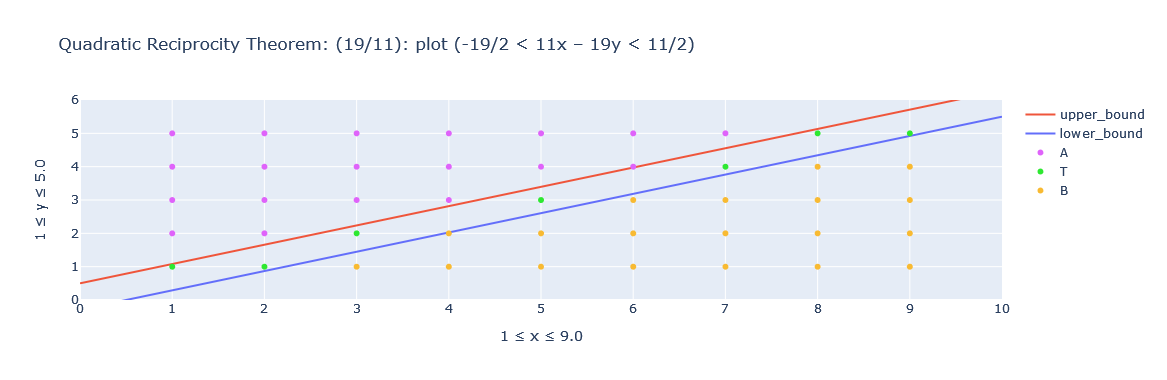

[((1, 1), -8), ((3, 2), -5), ((5, 3), -2), ((8, 5), -7)]
[((1, 2), 3), ((4, 7), 1), ((5, 9), 4)]


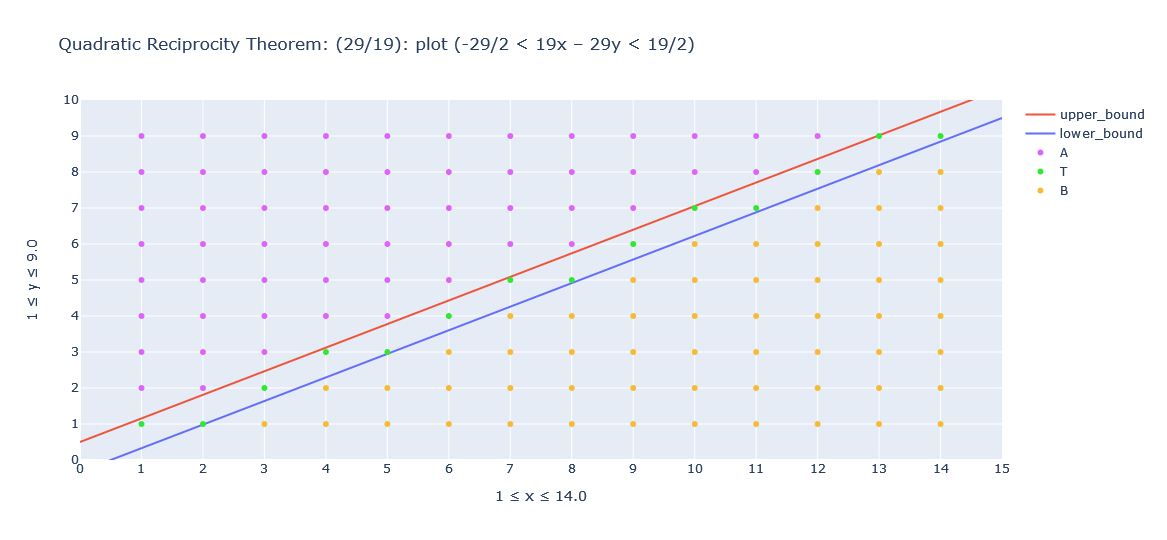

[((1, 1), -10), ((3, 2), -1), ((4, 3), -11), ((6, 4), -2), ((7, 5), -12), ((9, 6), -3), ((10, 7), -13), ((12, 8), -4), ((13, 9), -14)]
[((1, 2), 9), ((3, 5), 8), ((5, 8), 7), ((7, 11), 6), ((9, 14), 5)]


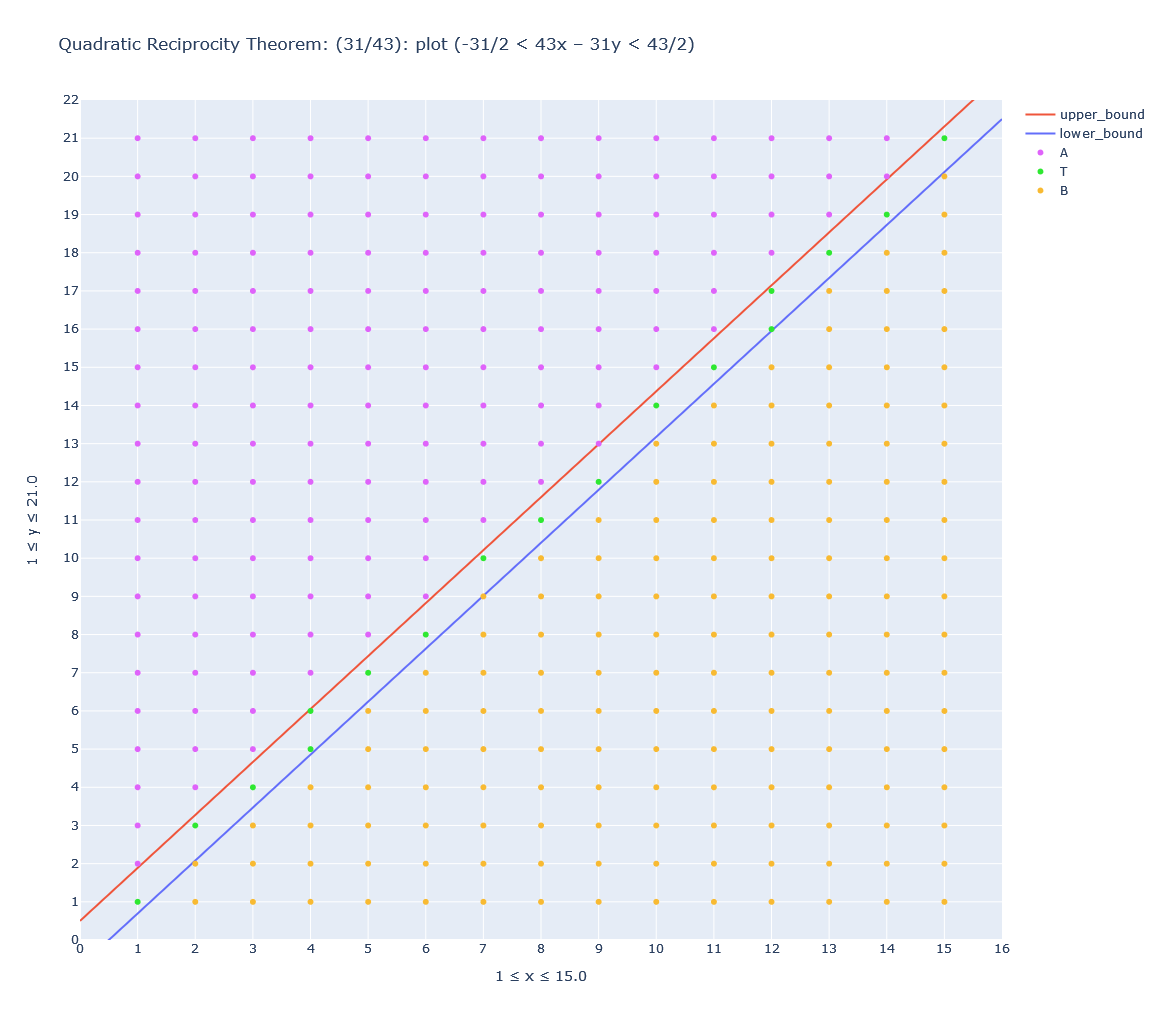

[((2, 3), -7), ((4, 6), -14), ((5, 7), -2), ((7, 10), -9), ((10, 14), -4), ((12, 17), -11), ((15, 21), -6)]
[((1, 1), 12), ((4, 3), 5), ((5, 4), 17), ((8, 6), 10), ((11, 8), 3), ((12, 9), 15), ((15, 11), 8), ((16, 12), 20), ((18, 13), 1), ((19, 14), 13)]


In [111]:

show_qrt_plot(p=19, q=11)

show_qrt_plot(p=29, q=19)

show_qrt_plot(p=31, q=43)


__2.	Can you extend the argument used for (3 / p) to produce a characterisation of (5 / p)__

(you need to look at the cases where p = 1 mod 4 and p = 3 mod 4 together with p = 1, 2, 3, 4 mod 5 to generate different rules.

#### 

__3.	Try to decide if $F_4$ and $F_5$ are prime or composite using the method on slide 9__

__4.	Look at Jones and Jones p132 (on weblearn) to complete the proof of the theorem on Fermat primes.__

__5.	Use the properties of the Jacobi symbol to calculate__

    i)  (91 / 143)
    ii)	    (1313 / 1649)
    iii)    (646 / 1207)

__6.	Apply the test described in slide 15 to determine that the following are composite.__

Choose a at random in the range 10 ≤ a ≤ 20 until you find an a such that $\left(\frac{a}{n} \right) \equiv a^{(n-1)/2}  \bmod(n)$. 

Use the binary expansion method to perform your modular exponentiation (so in i) $a^{71} = a^{64} * a^4 *a^2 * a^1$

	i)	n = 143	
    ii)	n = 161	
    iii)	n = 8633